In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [13]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(np.uint8)
# X_train, X_test, y_train, y_test = X[:6000], X[6000:7000], y[:6000], y[6000:7000]

c:\Users\olofs\anaconda3\envs\machine_learning\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 16 min

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [17]:
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(60000, 261)
(10000, 261)


In [18]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# svc_clf = SVC(verbose=True)
# param_grid = {'C': (0.1, 1, 2, 5, 10, 15), 'kernel': [('poly'), ('rbf')], 'gamma': [('auto'), ('scale')]}
# grid_svm = GridSearchCV(svc_clf, param_grid, cv=4)
# grid_svm.fit(X_train, y_train)



In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kn_clf = KNeighborsClassifier()
log_reg_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svc_clf = SVC()

clf_list = []
pred_list = []
scores_list = []


for clf in (kn_clf, log_reg_clf, rf_clf, svc_clf):
    clf.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)
    pred_list.append(y_pred)
    score = accuracy_score(y_test, y_pred)
    clf_list.append(clf)
    scores_list.append(score)
    clf_name = type(clf).__name__
    pred_name = ('y_pred_' + clf_name)




c:\Users\olofs\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
for score, name in enumerate(clf_list):
    print(f"{name}: {scores_list[score]}")

KNeighborsClassifier(): 0.9694
LogisticRegression(): 0.9217
RandomForestClassifier(): 0.946
SVC(): 0.9829


In [32]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = X_train_reduced[:10000], X_train_reduced[10000:12000], y[:10000], y[10000:12000]

# Do gridsearch on SVC with samaller dataset

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid_svc = {'C': (8, 10, 12), 'kernel': [('poly'), ('rbf')]}
grid_svc = GridSearchCV(svc_clf, param_grid_svc, cv=4)
grid_svc.fit(X_train_svc, y_train_svc)
result = pd.DataFrame(grid_svc.cv_results_)
result



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,7.850578,0.650743,1.354624,0.038310,8,poly,"{'C': 8, 'kernel': 'poly'}",0.9628,0.9744,0.9664,0.9600,0.9659,0.005406,4
1,4.663323,0.199672,2.257110,0.033810,8,rbf,"{'C': 8, 'kernel': 'rbf'}",0.9668,0.9764,0.9672,0.9608,0.9678,0.005575,1
2,8.068840,0.792682,1.623747,0.174566,10,poly,"{'C': 10, 'kernel': 'poly'}",0.9628,0.9744,0.9664,0.9600,0.9659,0.005406,4
3,5.879466,0.769215,2.364998,0.018110,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.9668,0.9764,0.9672,0.9608,0.9678,0.005575,1
4,8.106938,0.674637,1.637859,0.358984,12,poly,"{'C': 12, 'kernel': 'poly'}",0.9628,0.9744,0.9664,0.9600,0.9659,0.005406,4
5,5.717839,0.896669,2.446302,0.241097,12,rbf,"{'C': 12, 'kernel': 'rbf'}",0.9668,0.9764,0.9672,0.9608,0.9678,0.005575,1


In [39]:
svc_clf_1 = SVC()
svc_clf_grid = SVC(C=8, kernel='rbf')

svc_clf_1.fit(X_train_reduced, y_train)
svc_clf_grid.fit(X_train_reduced, y_train)

y_pred_1 = svc_clf_1.predict(X_test_reduced)
y_pred_grid = svc_clf_grid.predict(X_test_reduced)






In [40]:
print(f"Accuracy for clf 1: {accuracy_score(y_test, y_pred_1)}\nAccuracy score for clf grid: {accuracy_score(y_test, y_pred_grid)}")

Accuracy for clf 1: 0.9829
Accuracy score for clf grid: 0.9856


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [43]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



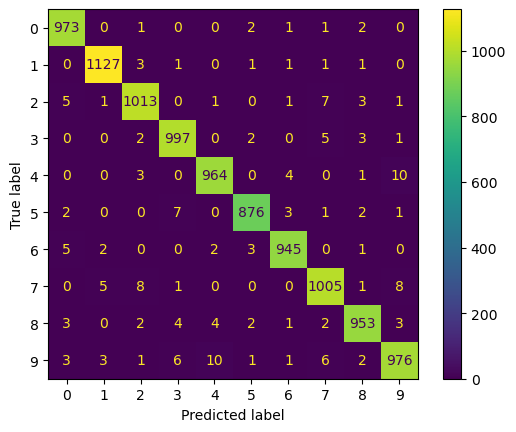

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_1)).plot()

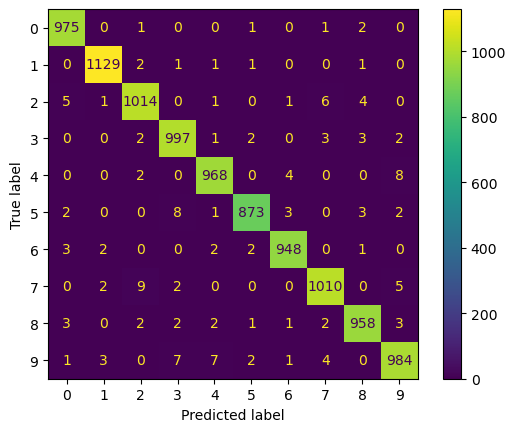

In [45]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_grid)).plot()